In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


Setup Complete


Importando o arquivo:/kaggle/input/covid-19-clean-complete-csv

In [2]:
file_path = '/kaggle/input/covid-19-clean-complete-csv/covid_19_clean_complete.csv'


Leitura e processamento:

In [3]:
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])


Dando um nome para a coluna Who Region

In [4]:
region_col = 'WHO Region'



Código para filtrar as três regiões de interesse:

In [5]:
regions = ["Eastern Mediterranean", "Americas", "Europe"]
df_sel = df[df[region_col].isin(regions)]


Juntar mortes acumuladas por região e data:

In [6]:
daily = df_sel.groupby(['Date', region_col])['Deaths'].sum().reset_index()


Transformando cada coluna em uma região:

In [7]:
pivot = daily.pivot(index='Date', columns=region_col, values='Deaths').fillna(0)

Modo seaborn

In [8]:
sns.set(style='whitegrid')


Criando gráfico de área empilhada

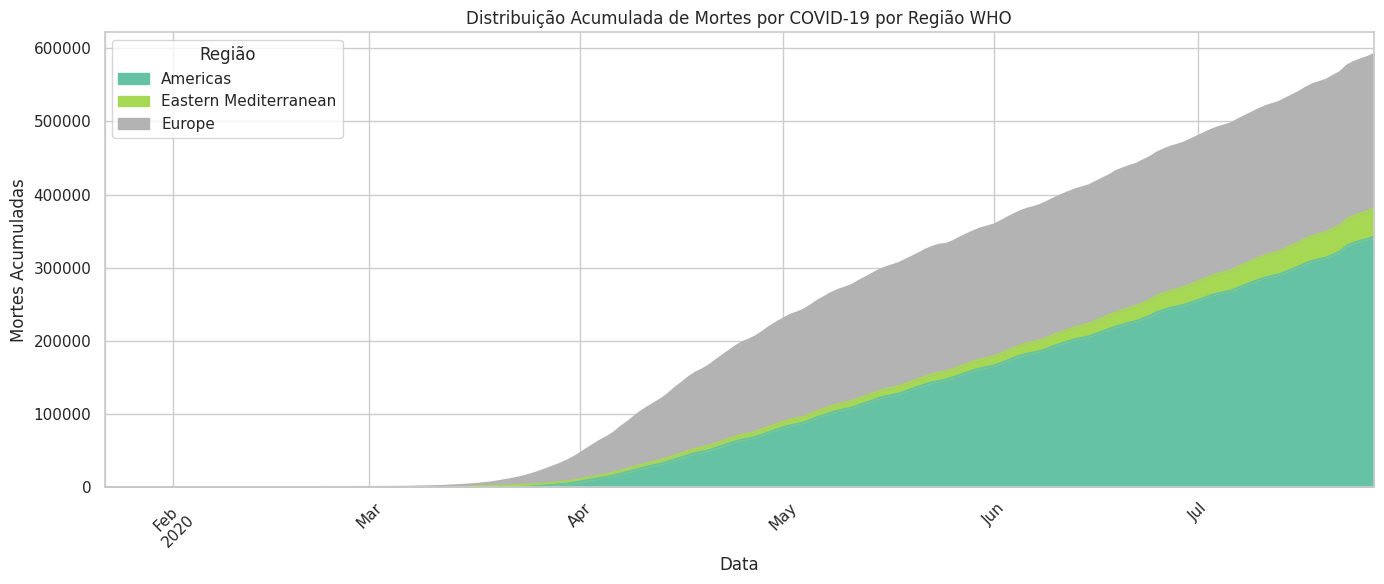

In [9]:
pivot.plot.area(figsize=(14, 6), stacked=True, cmap='Set2')
#Detalhamento:
plt.title('Distribuição Acumulada de Mortes por COVID-19 por Região WHO')
plt.xlabel('Data')
plt.ylabel('Mortes Acumuladas')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()


 1. Quais das regiões tiveram mais mortes?


Entre as três regiões é possível perceber que Europe e Eastern Mediterran tiveram mais mortes que Americas.

2. Qual o momento em que cada progressão começa a subir?

A progressão da Europe começa a subir na metade do mês de março, já a progressão do Eastern Mediterran e das Americas têm início um pouco além da metade de março.

 3. Como está a taxa de crescimento de cada progressão?

Código para acrescentar a progressão linear:

In [10]:
import matplotlib.dates as mdates
import numpy as np


Gerando o gráfico de área:

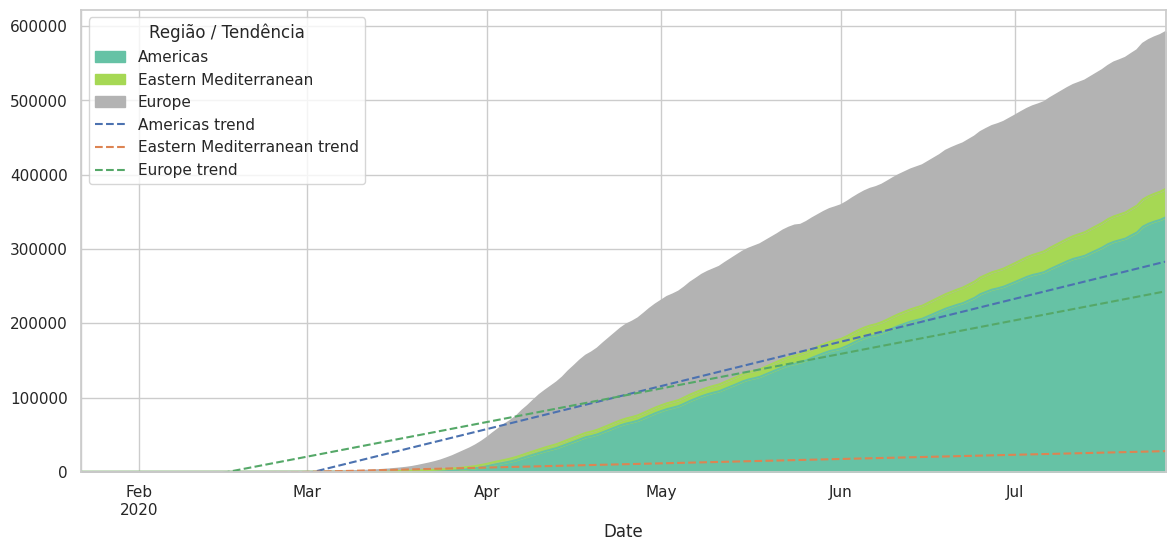

In [11]:
ax = pivot.plot.area(figsize=(14, 6), stacked=True, cmap='Set2')
#Converte as data para número:
x = mdates.date2num(pivot.index)
#Para cada região calculo da interseção e plotagem da reta:
for col in pivot.columns:
    y = pivot[col].values
    m, b = np.polyfit(x, y, 1)
    ax.plot(
        pivot.index,
        m * x + b,
        linestyle='--',
        linewidth=1.5,
        label=f'{col} trend'
    )
    #Detalhamento:
    plt.legend(title='Região / Tendência', loc='upper left')



 3. Como está a taxa de crescimento de cada progressão?

Europe: 50000 mortes por mês
Americas: 60000 mortes por mês
Eastern Mediterran: 5000 por mês

**Exercício 5.2:**

Cálculo do total de mortes por continente:

In [12]:
total_deaths = df_sel.groupby(region_col)['Deaths'] \
                     .sum() \
                     .reset_index() \
                     .sort_values('Deaths', ascending=False)





Plotando um BarChart com seaborn e matplotlib:

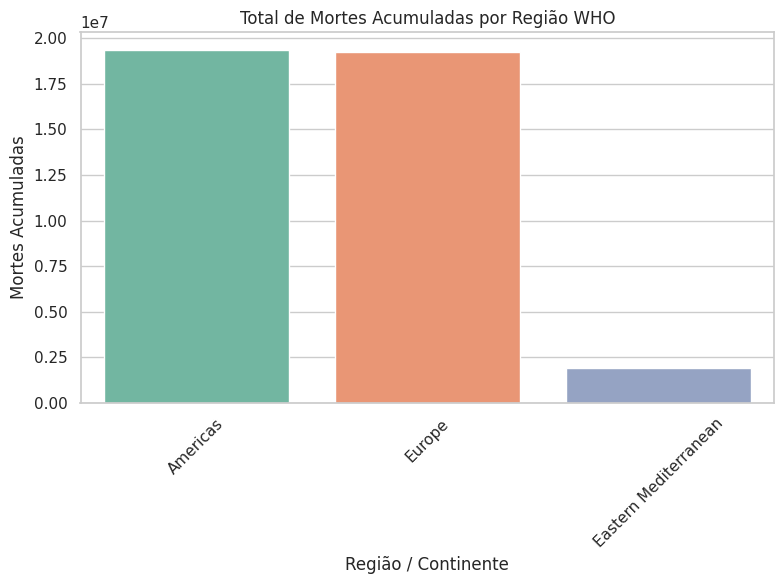

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(data=total_deaths, x=region_col, y='Deaths', palette='Set2')
plt.title('Total de Mortes Acumuladas por Região WHO')
plt.xlabel('Região / Continente')
plt.ylabel('Mortes Acumuladas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Quais os 2 continentes com maior número de mortes?

Américas e Europe.

2. Qual o continente com menor número de mortes?

Eastern Mediterran

3. Qual sua hipótese para responder às perguntas anteriores?

Eu olhei o Bar Chart e supos que os valores máximos mostrados fossem escolhidos em relação a um instante específico no tempo. 

**5.3- Scatter Plots**

Código para criar o Scatter Plots, baseado no código anerior do total de mortes:

<Axes: xlabel='WHO Region', ylabel='Deaths'>

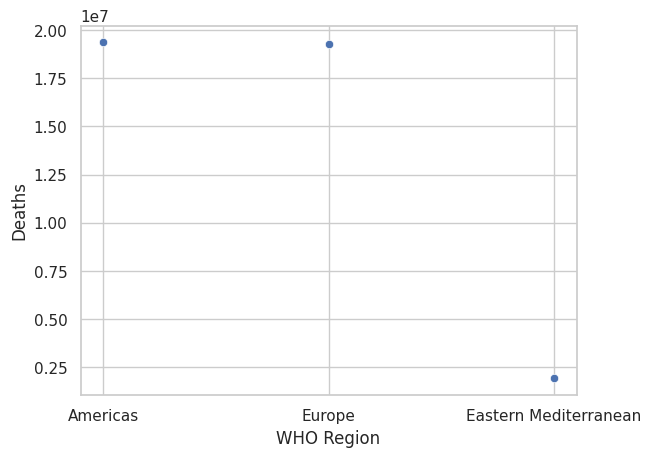

In [14]:
sns.scatterplot(x=total_deaths[region_col], y=total_deaths['Deaths'])

Código do gráfico com pontos coloridos:

<Axes: xlabel='WHO Region', ylabel='Deaths'>

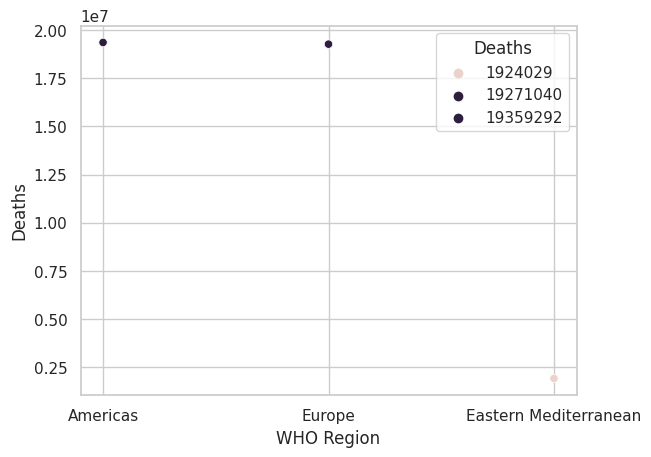

In [15]:
#Color-coded scatter plots:
sns.scatterplot(x=total_deaths[region_col], y=total_deaths['Deaths'], hue=total_deaths['Deaths'])

1. Onde se concentram a maioria dos dados?

A maioria dos dados sendo eles o número de mortes se concentram na região das Américas, primcipalmente entre os meses de Abril e Agosto de 2020. Sendo esse intervalo de tempo, baseado no gráfico de linhas anterior, mas tabém o Scatter Plot, evidencia qual região teve mais mortes.

 2. No segundo continentes por mais mortes por milhão, é possível perceber
 alguma relação entre as features

A relação entre as features, variáveis independentes usadas para análise, são o número de mortes, os países por região, os meses do ano, a relação entre elas seria soma do número de mortes por cada região que foi somado para montar o gráfico de pontos anterior.

 3. Pelo gráfico, é possível enxergar a relação entre essas colunas do banco de dados?

Relações visíveis no Scatter Plot: 
Data e número de mortes: mostra a evolução temporal do númeoro de mortes a medida que o tempo passa.
Região WHO e número de mortes: a região das Américas e Europe tiveram maior número de mortes, enquanto o  Eastern Mediterran teve menos.
Data e região WHO: permite observar quando cada região começou a ser afetada.

**5.4- Heatmap de Correlação**

Bibliotecas:

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Leitura do arquivo:

In [17]:
df = pd.read_csv('/kaggle/input/world-meter-data-csv/world meter data.csv')



Força a conversão de colunas-chaves em valores numéricos:

In [18]:
df['Population']    = pd.to_numeric(df['Population'],    errors='coerce')
df['Tests/1M pop']  = pd.to_numeric(df['Tests/1M pop'],  errors='coerce')


Selecionar apenas colunas numéricas e calcular correlação:


In [19]:
num_df = df.select_dtypes(include=[np.number])
corr   = num_df.corr()


Plotar heatmap


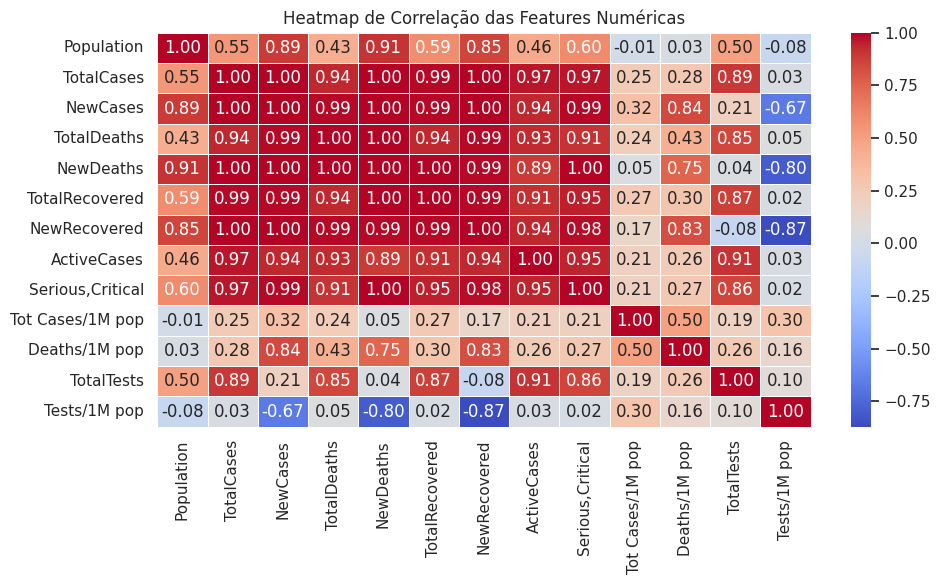

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Heatmap de Correlação das Features Numéricas')
plt.tight_layout()
plt.show()


 Exibir correlação específica


In [21]:
r = corr.at['Population', 'Tests/1M pop']
print(f'Correlação entre Population e Tests/1M pop: {r:.2f}')


Correlação entre Population e Tests/1M pop: -0.08
